In [12]:
import pandas as pd 
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt

In [13]:
df = pd.read_csv('../data/CS Course Enrollment Data.csv')

In [14]:
# assign id to each row
df['id'] = range(1, len(df) + 1)
df

,Semester Admitted,Department,Major,CSCI101_Pass_Sem,CSCI101_Tran_Sem,CSCI128_Pass_Sem,CSCI128_Tran_Sem,CSCI200_Pass_C_Sem,CSCI200_Tran_Sem,CSCI210_Pass_Sem,...,CSCI262_Tran_Sem,CSCI274_Pass_Sem,CSCI306_Pass_Sem,CSCI341_Pass_Sem,CSCI358_Pass_Sem,CSCI370_Pass_Sem,CSCI400_Pass_Sem,CSCI406_Pass_Sem,CSCI442_Pass_Sem,id
0,Spring 2021,Mechanical Engineering,Mechanical Engineering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Spring 2023,Interdisciplinary Program,Space Resources,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,Spring 2021,Physics,Physics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,Fall 2017,Metallurgical & Materials Eng,Metallurgical & Materials Eng,Spring 2011,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,Fall 2020,Civil & Environmental Enginrng,Engineering - Civil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7370,Summer Two 2018,Physics,Quantum Engineering,Spring 2019,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7371
7371,Summer Two 2018,Mechanical Engineering,Mechanical Engineering,Spring 2021,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7372
7372,Summer Two 2018,Petroleum,Petroleum Engineering,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7373
7373,Summer Two 2018,Computer Science,Computer Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Fall 2018,Fall 2018,Fall 2018,Fall 2018,Fall 2019,NaN,Spring 2019,Fall 2019,7374


In [36]:
# pivot table from wide to long
melted_df = pd.melt(df, id_vars=['Semester Admitted', 'Department', 'Major', 'id'], var_name='Class_Semester', value_name='Taken')

# filter out NaN rows
melted_df = melted_df.dropna(subset=['Taken', 'Department', 'Major'])

# split 'Class_Semester' into 'Class' and 'Semester'
melted_df[['Class', 'Semester_Type']] = melted_df['Class_Semester'].str.split('_', n=1, expand=True)
melted_df = melted_df.drop(columns=['Class_Semester'])

# split Semester_Type into Pass or Tran
melted_df[['Type', 'Garbage']] = melted_df['Semester_Type'].str.split('_', n=1, expand=True)
melted_df = melted_df.drop(columns=['Garbage', 'Semester_Type'])

# split taken 
melted_df[['Taken_Semester', 'Taken_Year']] = melted_df['Taken'].str.rsplit(' ', n=1, expand=True)

# replace 261 with 200, 262 with 220 
melted_df['Class'] = melted_df['Class'].replace('CSCI261', 'CSCI200')
melted_df['Class'] = melted_df['Class'].replace('CSCI262', 'CSCI220')

# remove semesters prior to Fall 2017 (NOT NEEDED)
# melted_df = melted_df[melted_df['Taken_Year'].astype(int) > 2016]
# melted_df = melted_df[~((melted_df['Taken_Year'].astype(int) == 2017) & (melted_df['Taken_Semester'] == 'Spring'))]

# Display the first few rows to verify
melted_df.sort_values(by='id').head(10)

,Semester Admitted,Department,Major,id,Taken,Class,Type,Taken_Semester,Taken_Year
66375,Spring 2021,Mechanical Engineering,Mechanical Engineering,1,Fall 2007,CSCI200,Pass,Fall,2007
66376,Spring 2023,Interdisciplinary Program,Space Resources,2,Fall 2007,CSCI200,Pass,Fall,2007
66377,Spring 2021,Physics,Physics,3,Fall 2008,CSCI200,Pass,Fall,2008
81128,Fall 2017,Metallurgical & Materials Eng,Metallurgical & Materials Eng,4,Fall 2011,CSCI220,Pass,Fall,2011
3,Fall 2017,Metallurgical & Materials Eng,Metallurgical & Materials Eng,4,Spring 2011,CSCI101,Pass,Spring,2011
66378,Fall 2017,Metallurgical & Materials Eng,Metallurgical & Materials Eng,4,Fall 2009,CSCI200,Pass,Fall,2009
66379,Fall 2020,Civil & Environmental Enginrng,Engineering - Civil,5,Fall 2009,CSCI200,Pass,Fall,2009
66380,Spring 2018,Civil & Environmental Enginrng,Engineering - Civil,6,Fall 2009,CSCI200,Pass,Fall,2009
110631,Spring 2024,Engineering,Engineering - Electrical,7,Fall 2014,CSCI341,Pass,Fall,2014
66381,Spring 2024,Engineering,Engineering - Electrical,7,Fall 2009,CSCI200,Pass,Fall,2009


# Validation

In [16]:
print("DEPARTMENTS:")
print("\t", melted_df['Department'].unique(), '\n')

print("MAJORS:")
print("\t", melted_df['Major'].unique(), '\n')

print("CLASSES:")
print("\t", melted_df['Class'].unique(), '\n')

print("SEMESTERS:")
print("\t", melted_df['Taken_Year'].unique(), '\n')

DEPARTMENTS:
	 ['Geophysics' 'Electrical Enginrg & Comp Sci' 'Electrical Engineering'
 'Computer Science' 'Mechanical Engineering' 'Applied Math & Statistics'
 'Economics and Business' 'Civil & Environmental Enginrng' 'Physics'
 'Interdisciplinary Program' 'Metallurgical & Materials Eng'
 'Engineering Design & Society' 'Petroleum' 'Geo & Geological Engineering'
 'Non-Degree Program Undergrad' 'Undecided'
 'Chemical & Biological Engineer' 'Chemistry' 'Honors' 'Mining'
 'Non-Degree Program Grad Level' 'Humanities Arts Social Science'
 'Engineering' 'Environ Science & Engineering'] 

MAJORS:
	 ['Geophysical Engineering' 'Computer Science' 'Electrical Engineering'
 'Mechanical Engineering' 'EE-Engy & Pwr Electrncs Spclty' 'Statistics'
 'EE-Intg Crcts & Elctrnc Spclty' 'CS-Data Science Spclty'
 'CS-Computer Eng Spclty' 'CS-Research Honors Spclty'
 'Engineering & Tech Management' 'CS-Robotics Intel Sys Spclty'
 'Computational & Applied Math' 'Civil Engineering' 'Engineering Physics'
 'EE-Ant

In [17]:
# save to .csv
melted_df.to_csv('../data/CS_Course_Enrollment_Data_Pivot.csv', index=False)

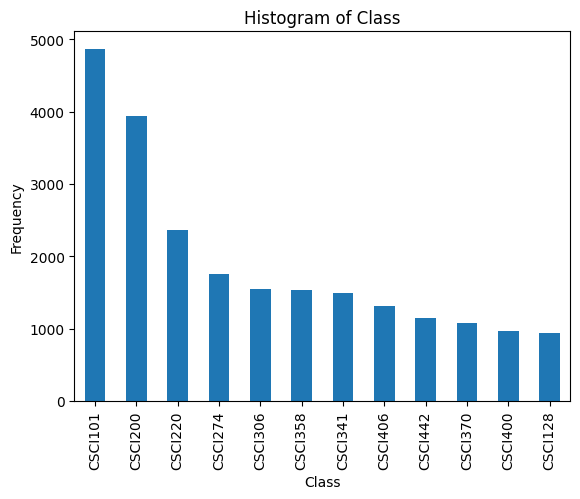

In [18]:
# plot histogram of different Classes 
melted_df['Class'].value_counts().plot(kind='bar')
plt.title('Histogram of Class')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

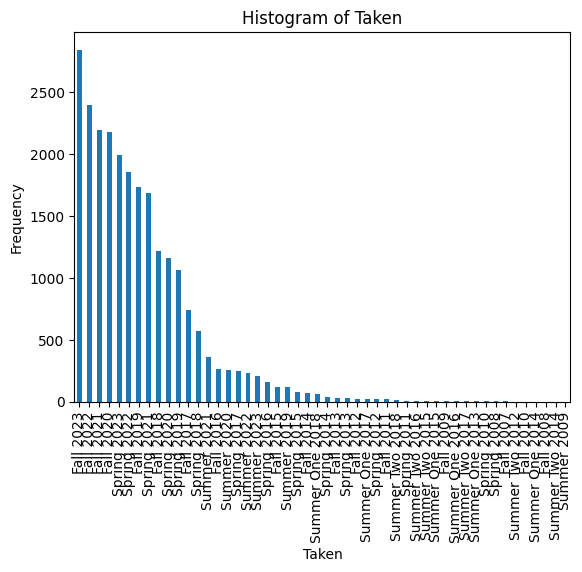

In [27]:
# plot histogram of different Semesters
melted_df['Taken'].value_counts().plot(kind='bar')
plt.title('Histogram of Taken')
plt.xlabel('Taken')
plt.ylabel('Frequency')
plt.show()

# Logit Manipulation

In [38]:
unique_ids = melted_df['id'].unique()
unique_sems = melted_df['Taken'].unique()
unique_classes = melted_df['Class'].unique()

print(unique_ids)
print(1 in unique_ids)

[   4   10   13 ... 6862 7081 7157]
True


In [33]:
id_list = []
for id in unique_ids:
    for i in range(len(unique_classes)):
        for j in range(len(unique_sems)):
            id_list.append(id)

class_list = []
for cl in unique_classes:
    for i in range(len(unique_ids) * len(unique_sems)):
        class_list.append(cl)

sem_list = []
for i in range(len(unique_ids) * len(unique_classes)):
    for sem in unique_sems:
        sem_list.append(sem)

In [34]:
log_df = pd.DataFrame({'id': id_list, 'Class': class_list, 'Taken': sem_list})
log_df

,id,Class,Taken
0,4,CSCI101,Spring 2011
1,4,CSCI101,Fall 2012
2,4,CSCI101,Spring 2012
3,4,CSCI101,Spring 2016
4,4,CSCI101,Spring 2013
...,...,...,...
4415395,7157,CSCI442,Summer Two 2018
4415396,7157,CSCI442,Summer One 2013
4415397,7157,CSCI442,Summer One 2015
4415398,7157,CSCI442,Summer One 2016


In [45]:
# match on id
melted_df['unique_id'] = melted_df['id'].astype(str) + '_' + melted_df['Taken'].astype(str) + '_' + melted_df['Class'].astype(str)
log_df['unique_id'] = log_df['id'].astype(str) + '_' + log_df['Taken'].astype(str) + '_' + log_df['Class'].astype(str)
log_df['boolean'] = log_df['unique_id'].isin(melted_df['unique_id'])
log_df

,id,Class,Taken,unique_id,boolean
0,4,CSCI101,Spring 2011,4_Spring 2011_CSCI101,True
1,4,CSCI101,Fall 2012,4_Fall 2012_CSCI101,False
2,4,CSCI101,Spring 2012,4_Spring 2012_CSCI101,False
3,4,CSCI101,Spring 2016,4_Spring 2016_CSCI101,False
4,4,CSCI101,Spring 2013,4_Spring 2013_CSCI101,False
...,...,...,...,...,...
4415395,7157,CSCI442,Summer Two 2018,7157_Summer Two 2018_CSCI442,False
4415396,7157,CSCI442,Summer One 2013,7157_Summer One 2013_CSCI442,False
4415397,7157,CSCI442,Summer One 2015,7157_Summer One 2015_CSCI442,False
4415398,7157,CSCI442,Summer One 2016,7157_Summer One 2016_CSCI442,False


In [46]:
print(len(log_df[log_df['boolean'] == True])) 
print(log_df['boolean'].value_counts())
print(len(melted_df))

20457
boolean
False    4394943
True       20457
Name: count, dtype: int64
24137
